The **groupby** function is used to split a dataset into groups based on some criteria, apply a function (such as aggregation), and then combine the results back into a structured form. It’s a very useful tool for analyzing data, especially when you need to perform operations like summing, averaging, or counting data within subsets.

Key Operations with groupby: **bold text**
*  Splitting: Divide the data into groups based on some criteria (such as a column's unique values).
* Applying: Perform a function (e.g., mean, sum, count) on each group.
* Combining: Combine the results back into a final output.





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)

# Using groupby
grouped = df.groupby('Category')['Value'].sum()
print(grouped)


Category
A     90
B    120
Name: Value, dtype: int64


**Correlation** -  strength and direction of the relationship between two variables. It quantifies how much one variable changes when another variable changes. Correlation is used to identify patterns, trends, and dependencies between two or more variables in data.

**Magnitude**: The strength of the correlation, ranging from -1 to 1.
*   +1: Perfect positive correlation — as one variable increases, the other also increases in a perfectly linear manner.
*   -1: Perfect negative correlation — as one variable increases, the other decreases in a perfectly linear manner.
*   0: No correlation — no linear relationship exists between the variables

**Direction**:
*   Positive Correlation: When one variable increases, the other variable also tends to increase.
*   Negative Correlation: When one variable increases, the other variable tends to decrease.
*   Zero Correlation: No discernible linear relationship between the two variables.








In [ ]:
# sns.heatmap{corr, cmap='RdBu', vmin=1, vmax=1, annot=True,
#             annot_kws={'frontsize':11, 'fontweight':'bold'}}

**Data Profiling and Summary Statistics**
*   Objective: Get an overview of each feature in the dataset.
*   Steps:
         *   View data structure, data types, and missing values.
         *   Calculate basic summary statistics (mean, median, standard deviation, etc.) for numerical features.

In [ ]:
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 70, size=100),
    'Salary': np.random.normal(50000, 12000, size=100),
    'Department': np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], size=100),
    'Years_of_Experience': np.random.randint(1, 40, size=100),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], size=100)
}

# Convert the columns to float before introducing NaN values
data['Years_of_Experience'] = data['Years_of_Experience'].astype(float)

# Introduce missing values
data['Salary'][5:10] = np.nan
data['Years_of_Experience'][15:20] = np.nan


In [ ]:
df = pd.DataFrame(data)

# 1. View data structure and data types
print("Data Structure and Data Types:")
print(df.info())

Data Structure and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  100 non-null    int64  
 1   Salary               95 non-null     float64
 2   Department           100 non-null    object 
 3   Years_of_Experience  95 non-null     float64
 4   Marital_Status       100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None


In [ ]:
#Check for missing values
print("Missing Values by Column:")
print(df.isnull().sum())

Missing Values by Column:
Age                    0
Salary                 5
Department             0
Years_of_Experience    5
Marital_Status         0
dtype: int64


In [ ]:
#Calculate basic summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(df.describe())  # Provides count, mean, std, min, 25%, 50%, 75%, max for each numerical column
print("\n")

Summary Statistics for Numerical Features:
              Age        Salary  Years_of_Experience
count  100.000000     95.000000            95.000000
mean    41.570000  49409.527745            20.052632
std     15.537023  11907.645421            11.468151
min     18.000000  21943.446189             1.000000
25%     29.000000  41639.829223             9.500000
50%     41.000000  49470.651105            21.000000
75%     55.250000  55919.205681            29.500000
max     69.000000  77932.857310            39.000000




In [ ]:
#Additional descriptive statistics (median, for example)
print("Median of Numerical Features:")
print(df.median(numeric_only=True))  # 'numeric_only=True' ensures non-numeric columns are ignored

Median of Numerical Features:
Age                       41.000000
Salary                 49470.651105
Years_of_Experience       21.000000
dtype: float64



**Skewed** data refers to a dataset where the values are not symmetrically distributed around the mean. Instead, the data tends to "lean" towards one side, creating an asymmetrical shape in its distribution.

# There are two main types of skewness:

# Positively Skewed (Right-Skewed) Data:
The tail extends to the right (towards larger values).
Most data points are concentrated on the lower (left) side, but a few larger values "pull" the tail to the right.
Mean > Median > Mode.

Example:
Dataset: 2,3,5,6,7,50
Distribution: Majority of values (2, 3, 5, 6, 7) are low, but 50 is an extreme value (outlier).

Real-World Examples:

Income distribution (few people earn very high incomes, pulling the average up).

House prices in a city (most houses are affordable, but luxury homes are expensive).

# Negatively Skewed (Left-Skewed) Data:
The tail extends to the left (towards smaller values).
Most data points are concentrated on the higher (right) side, but a few smaller values "pull" the tail to the left.
Mean < Median < Mode.

Example:
Dataset: 2,3,5,50,51,52
Distribution: Majority of values (50, 51, 52) are high, but 2 and 3 are extreme low values.

Real-World Examples:

Age at retirement (most people retire around 60–70, but a few retire much earlier).

Test scores where most students perform well, but a few score very low.

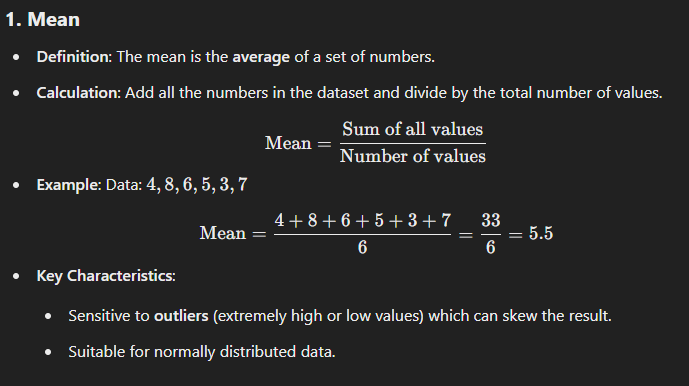

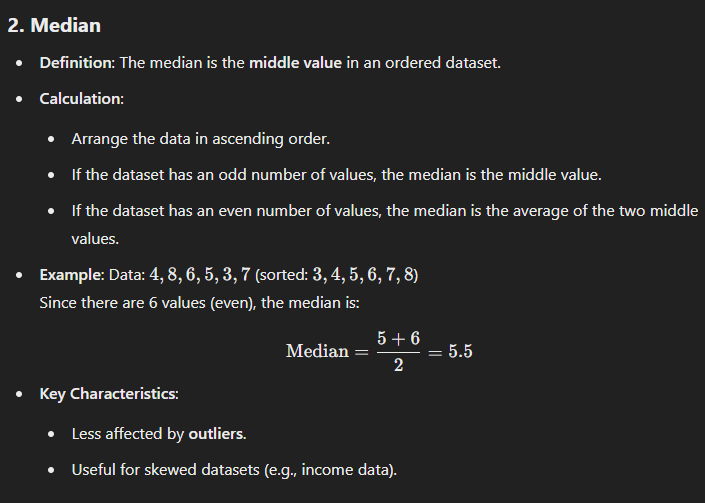

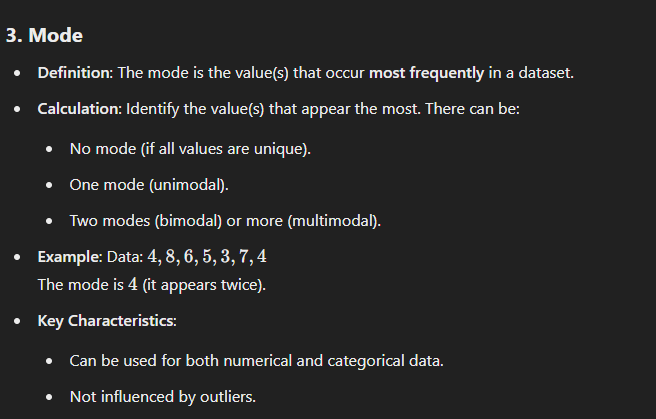

In [18]:
#Handling missing values
import pandas as pd

# Example data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, 30, None, 35, 40],
    'Gender': ['F', 'M', None, 'M', 'F'],
    'Salary': [50000, 60000, 70000, None, None]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

Original Dataset:
      Name   Age Gender   Salary
0    Alice  25.0      F  50000.0
1      Bob  30.0      M  60000.0
2  Charlie   NaN   None  70000.0
3    David  35.0      M      NaN
4     None  40.0      F      NaN


In [19]:
print("\nHandling Missing Values:")
print(df.isnull().sum())


Handling Missing Values:
Name      1
Age       1
Gender    1
Salary    2
dtype: int64


Imputation refers to the process of replacing missing data in a dataset with substituted values.

fit():

The **imputer.fit()** step calculates the mean of the
column **Age**: Mean = 25+30+35+40 / 4 = 32.5

transform(): The **imputer.transform()** step replaces the **NaN** value in the **Age** column with the calculated mean, **32.5**.

fit_transform(): Combines both steps in a single call, making the code more concise.

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
#Imputation for numerical columns
mean_imputer = SimpleImputer(strategy = 'mean')
df['Age'] = mean_imputer.fit_transform(df[['Age']])
print(df.isnull().sum())

Name      1
Age       0
Gender    1
Salary    2
dtype: int64


In [26]:
# Ensure that missing values are represented as NaN (not None)
df['Name'] = df['Name'].replace({None: np.nan})
df['Gender'] = df['Gender'].replace({None: np.nan})

In [27]:
# Imputation for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df[['Gender', 'Name']] = mode_imputer.fit_transform(df[['Gender', 'Name']])
print(df.isnull().sum())

Name      0
Age       0
Gender    0
Salary    2
dtype: int64


In [ ]:
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,30.0,M,60000.0
2,Charlie,32.5,None,70000.0
3,David,35.0,M,NaN
4,None,40.0,F,NaN


In [29]:
# Dropping rows with missing salary
#df = df.dropna(subset=['Salary'])
# Impute misssing salary with median
median_imputer = SimpleImputer(strategy = 'median')
df['Salary'] = median_imputer.fit_transform(df[['Salary']])
print(df.isnull().sum())

Name      0
Age       0
Gender    0
Salary    0
dtype: int64


In [30]:
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,30.0,M,60000.0
2,Charlie,32.5,F,70000.0
3,David,35.0,M,60000.0
4,Alice,40.0,F,60000.0


In [31]:
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,30.0,M,60000.0
2,Charlie,32.5,F,70000.0
3,David,35.0,M,60000.0
4,Alice,40.0,F,60000.0


In [48]:
del df
globals().clear()

In [2]:
# Synthetic dataset with outliers
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.normal(50, 10, 1000),
    'feature2': np.random.normal(30, 5, 1000),
})

print(data)

      feature1   feature2
0    54.967142  36.996777
1    48.617357  34.623168
2    56.476885  30.298152
3    65.230299  26.765316
4    47.658466  33.491117
..         ...        ...
995  47.188997  35.350751
996  67.976865  29.867394
997  56.408429  25.590627
998  44.288210  29.184665
999  55.725828  26.275487

[1000 rows x 2 columns]


np.random.normal(200, 20, 20):

This generates 20 random numbers from a normal distribution with:

A mean (loc) of 200.

A standard deviation (scale) of 20.

The numbers are sampled to mimic real-world data that might have variation centered around 200.

data.loc[ : : 50, 'feature1']:

data.loc[ : : 50, 'feature1'] selects every 50th row of the column feature1 in the data DataFrame.

The slicing syntax ::50 means:

Start from the first row (default for :).

Select every 50th row (step = 50).

This ensures that the operation modifies only the rows at indices 0, 50, 100, 150, and so on.

In [3]:
# Add outliers to the dataset
data.loc[::50, 'feature1'] = np.random.normal(200, 20, 20)
data.loc[::100, 'feature2'] = np.random.normal(70, 10, 10)

{'feature1': [0, 50, 74, 100, 150, 179, 200, 209, 250, 262, 300, 350, 400, 450, 478, 500, 550, 600, 646, 650, 668, 700, 750, 800, 850, 900, 950], 'feature2': [0, 61, 100, 101, 200, 300, 500, 539, 591, 600, 615, 700, 750, 800, 900, 957, 971]}


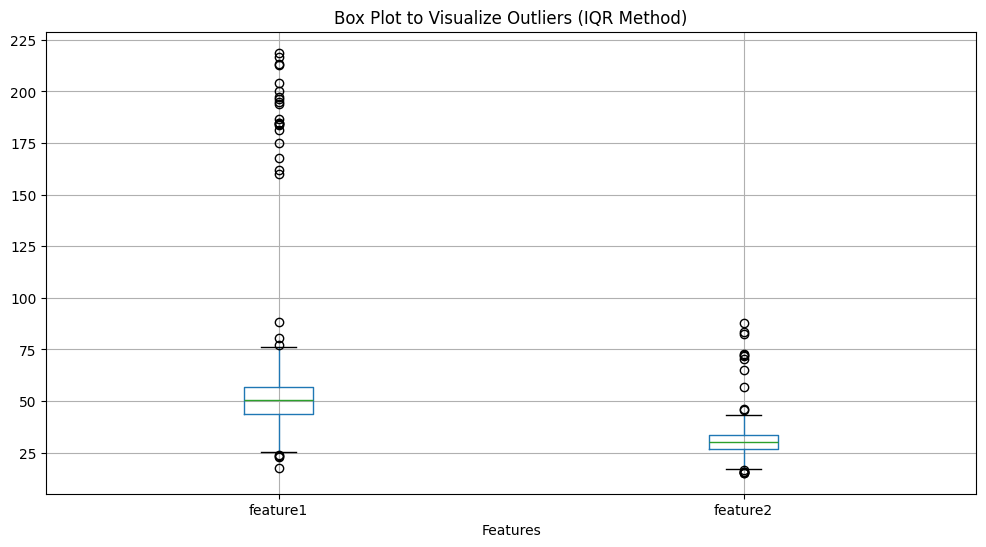

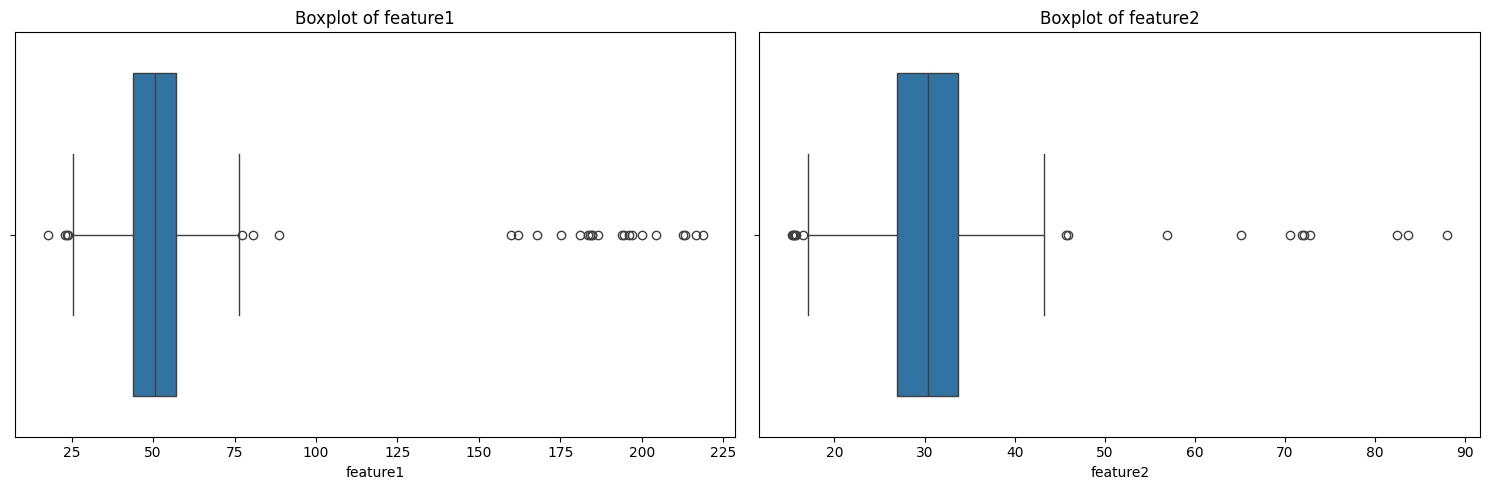

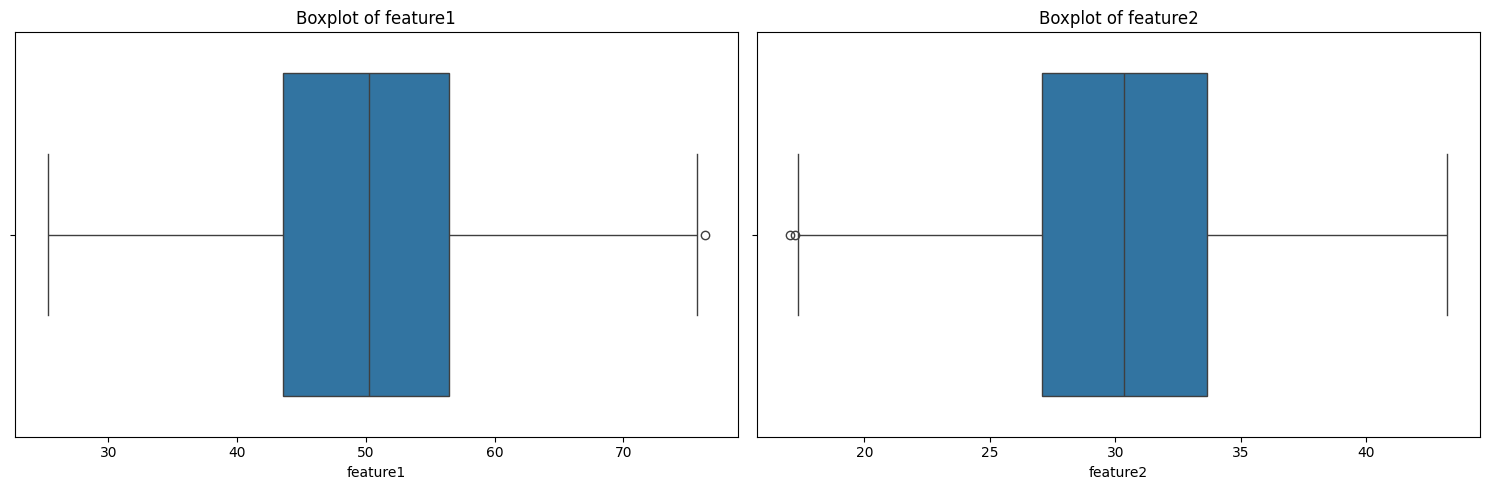

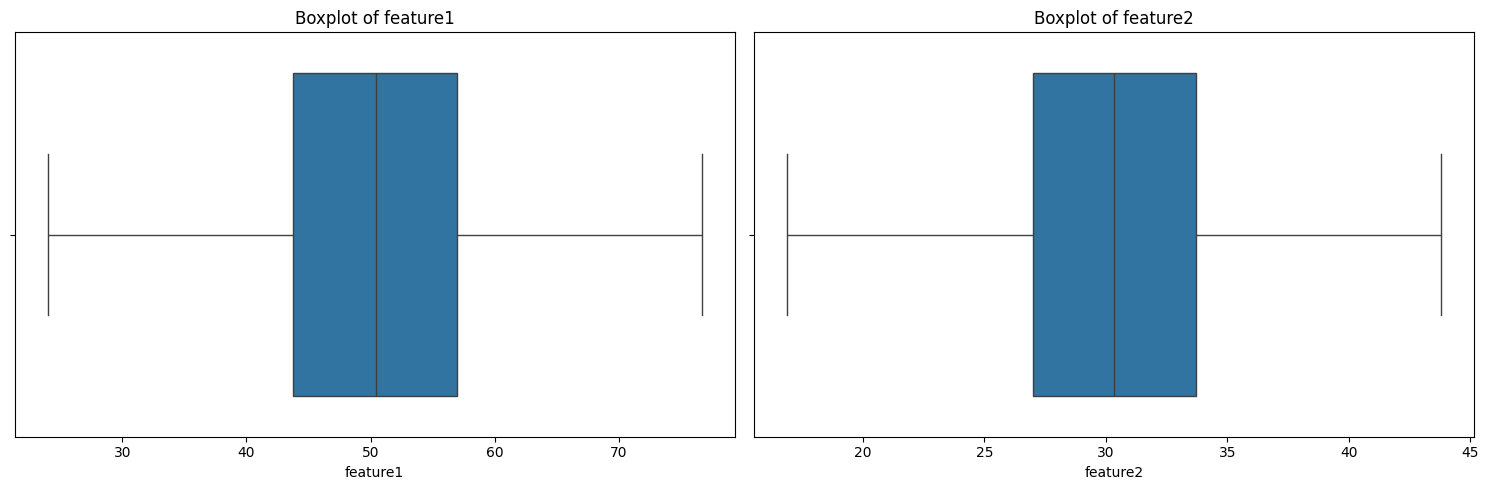

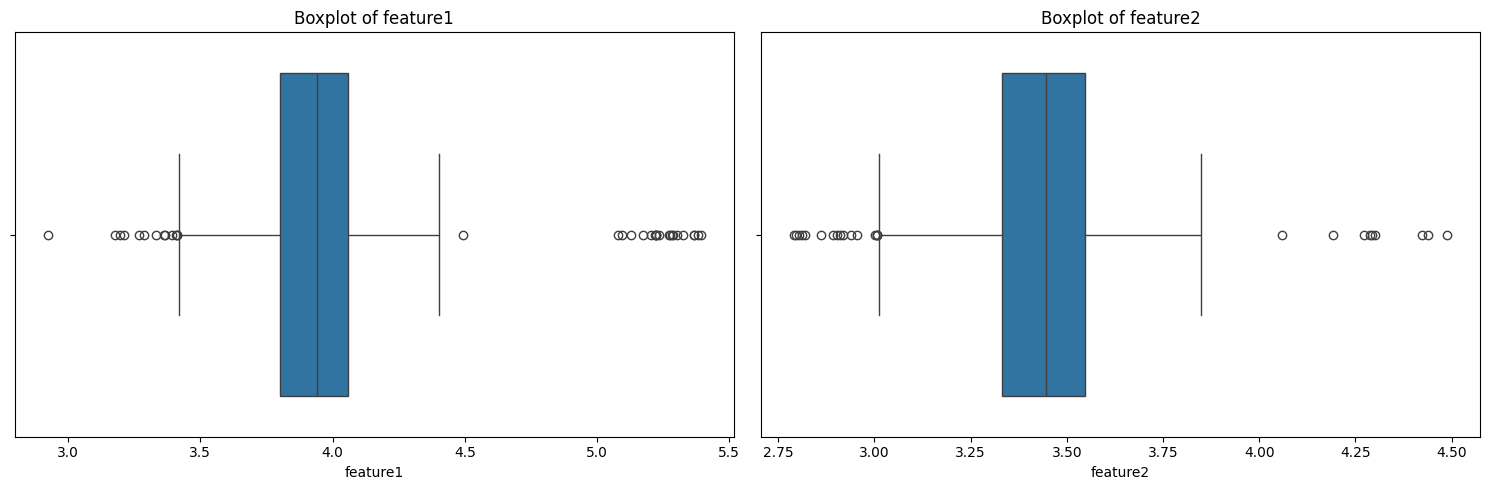

In [7]:
# Visulaize outliers with box plots
def visualize_outliers(df, title="Box Plot of Features"):
  plt.figure(figsize = (15, 5))

  for index, column in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), index)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

  plt.tight_layout()
  plt.show()

# Helper function for calculate IQR Bounds
def calculate_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

#Detect outliers using IQR method
def detect_outliers_iqr(df):
  outliers = {}
  for column in df.columns:
    lower_bound, upper_bound = calculate_iqr_bounds(df[column])

    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()

  return outliers

outlier_indices = detect_outliers_iqr(data)
print(outlier_indices)

plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("Box Plot to Visualize Outliers (IQR Method)")
plt.xlabel("Features")
plt.show()

#Handle outliers
def handle_outliers(df, method='remove'):
    df_cleaned = df.copy()

    if method == 'remove':
        outliers = detect_outliers_iqr(df)
        df_cleaned = df.drop(index=[idx for indices in outliers.values() for idx in indices])

    elif method == 'cap':
        for column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # np.clip ensures that the values in the column are "capped" at the bounds,
            # effectively bringing outliers (values outside the bounds) into the range between
            # the lower_bound and upper_bound.
            df_cleaned[column] = np.clip(df[column], lower_bound, upper_bound)

    elif method == 'transform':
        for column in df.columns:
            df_cleaned[column] = np.log1p(df[column].clip(lower=0))

    return df_cleaned

# Visualize original dataset
visualize_outliers(data, "Original Dataset")

# Apply each outlier handling method and visualize
methods = ['remove', 'cap', 'transform']
for method in methods:
    cleaned_data = handle_outliers(data, method=method)
    visualize_outliers(cleaned_data, f"Dataset After '{method.capitalize()}' Method")


Box-plot : https://www.youtube.com/watch?v=INSIyaZUXIY

How is IQR calculated?

**Quartiles**:

Quartiles divide a dataset into four equal parts after sorting the values.

Q1 (First Quartile): The median of the lower half of the data (25th percentile).

Q3 (Third Quartile): The median of the upper half of the data (75th percentile).

These quartiles mark the boundaries of the middle 50% of the dataset.

**IQR Formula: IQR=Q3−Q1**

The IQR represents the range of the middle 50% of the data.

It gives a measure of variability while excluding the influence of extreme values.

'**remove**': Drop rows with outliers.

'**cap**': Limit outlier values to the boundaries defined by the IQR method.

'**transform**': Apply a transformation to reduce the influence of extreme values.

# Use Cases:

'**remove**': Useful when outliers represent noise or invalid data.

'**cap**': Ideal for preserving all data points but limiting extreme values.

'**transform**': Suitable when data has natural skewness (e.g., income, population).